In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

%matplotlib inline

Import the Loan Default data

In [2]:
loan_df = pd.read_csv('Raw Data/Loan_Default.csv')

Take a look at the dataset


In [3]:
loan_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
loan_df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [5]:
loan_df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [6]:
loan_df.shape

(148670, 34)

Lets check our ID is unique. 

In [7]:
loan_df.ID.nunique()

148670

We have the same # of unique IDs as observations in our dataset so we are good. 

In [8]:
missings = loan_df.isna().sum()
missings = missings[missings > 0]
missings 

loan_limit                    3344
approv_in_adv                  908
loan_purpose                   134
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
property_value               15098
income                        9150
age                            200
submission_of_application      200
LTV                          15098
dtir1                        24121
dtype: int64

So we have 14 variables with missing values. We are missing a decent amount of interest rate and uprfront charges. Also, LTC and loan value and dtir1. 

Lets look at some summary stats of our numerical data.

In [9]:
loan_df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


Observations:
Data is only for the year 2019. 
Term looks like its in months.
We have a LTV of ~8K. Probably need to look into the outliers and drop as needed. 
Status is a binary.
We arent missing obs for ID, year, loan amount, credit score, and status. 

Lets start with looking at the LTV plot. 

Text(0.5, 1.0, 'Loan to Value vs Loan Value')

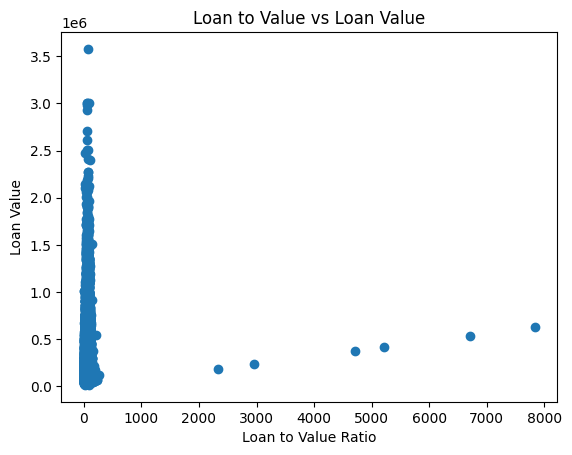

In [10]:
plt.scatter(loan_df.LTV, loan_df.loan_amount)
plt.xlabel("Loan to Value Ratio")
plt.ylabel("Loan Value")
plt.title('Loan to Value vs Loan Value')

Definitely can see some outliers for both LTV and Loan Value actually. 

Look into our categorical variables. See if there are categories we should combine/eliminate. 

In [11]:
loan_df.Gender.value_counts(normalize=True)

Male                 0.284832
Joint                0.278462
Sex Not Available    0.253306
Female               0.183399
Name: Gender, dtype: float64

In [12]:
loan_df.loan_limit.value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [13]:
loan_df.approv_in_adv.value_counts()

nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64

In [14]:
loan_df.loan_type.value_counts()

type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64

Lets create z scores of our numeric variables

In [15]:
loan_df['ID'] = loan_df['ID'].apply(str)
loan_df['year'] = loan_df['year'].apply(str)
numeric_cols = loan_df.select_dtypes(include=[np.number]).columns
def zscore_missing(col):
    return zscore(col, nan_policy = 'omit')
z_scores = loan_df[numeric_cols].apply(zscore_missing)

Let's summarize these to confirm we have outliers, i.e. abs(z) > 3. Then we will drop them.

In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
z_scores.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.00000,112231.00000,112031.00000,109028.00000,148629.00000,133572.00000,139520.00000,148670.00000,133572.00000,148670.00000,124549.00000
mean,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-1.71073,-7.20619,-7.95192,-0.99197,-4.09418,-1.36106,-1.07093,-1.72417,-1.79594,-0.57188,-3.10400
25%,-0.73198,-0.74899,-0.71272,-0.81311,0.42568,-0.63871,-0.49832,-0.86981,-0.30704,-0.57188,-0.63847
50%,-0.18823,-0.09882,-0.09991,-0.19333,0.42568,-0.22197,-0.18430,-0.00681,0.05978,-0.57188,0.12015
75%,0.57301,0.58698,0.65052,0.48830,0.42568,0.36147,0.24054,0.86482,0.33622,-0.57188,0.68912
max,17.64670,7.04418,5.68248,17.46329,0.42568,44.48068,87.98847,1.72781,194.12054,1.74863,2.20637


In [17]:
loan_df['outliers'] = ((abs(z_scores.LTV) > 3) | 
            (abs(z_scores.loan_amount) > 3) |
            (abs(z_scores.Upfront_charges) > 3) |
            (abs(z_scores.income) > 3) |
            (abs(z_scores.property_value) > 3))
loan_df2 = loan_df[loan_df.outliers == 0]

Text(0.5, 1.0, 'Loan to Value vs Loan Value')

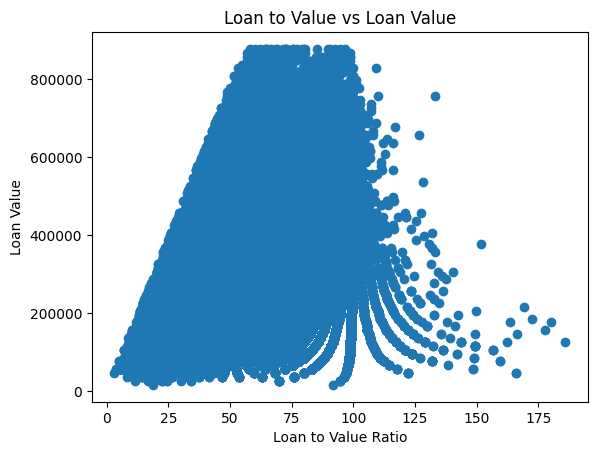

In [18]:
plt.scatter(loan_df2.LTV, loan_df2.loan_amount)
plt.xlabel("Loan to Value Ratio")
plt.ylabel("Loan Value")
plt.title('Loan to Value vs Loan Value')

This graph looks much better.

Let's restandardize our new data set for our models, and combine into a data set to use. 

In [19]:
z_scores = loan_df2[numeric_cols].apply(zscore_missing)

In [20]:
nonnumeric_cols = loan_df.select_dtypes(include=[np.object_]).columns
df_nonnum = loan_df2[nonnumeric_cols]
loans = df_nonnum.join(z_scores, how='inner')